In [1]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 通过ucimlrepo加载蘑菇数据集
mushroom = fetch_ucirepo(id=73)
df = pd.concat([mushroom.data.features, mushroom.data.targets], axis=1)

# 缺失值处理（蘑菇数据集的stalk-root有缺失）
if df['stalk-root'].isnull().any():
    df['stalk-root'].fillna(df['stalk-root'].mode()[0], inplace=True)

# 编码
df_encoded = df.copy()
for col in df_encoded.columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

X = df_encoded.drop('poisonous', axis=1)
y = df_encoded['poisonous']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

C:\Users\Hastu\AppData\Local\Temp\ipykernel_19868\2318537810.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['stalk-root'].fillna(df['stalk-root'].mode()[0], inplace=True)


In [2]:
from sklearn.tree import DecisionTreeClassifier
clf_tree = DecisionTreeClassifier(random_state=42)
clf_tree.fit(X_train, y_train)
y_pred_tree = clf_tree.predict(X_test)
acc_tree = accuracy_score(y_test, y_pred_tree)
print("决策树模型准确率：%.4f" % acc_tree)

决策树模型准确率：1.0000


In [3]:
print("\n决策树模型详细分类报告：")
print(classification_report(y_test, y_pred_tree))
print("混淆矩阵：")
print(confusion_matrix(y_test, y_pred_tree))


决策树模型详细分类报告：
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1263
           1       1.00      1.00      1.00      1175

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

混淆矩阵：
[[1263    0]
 [   0 1175]]


In [4]:
from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression(max_iter=500, solver='lbfgs')
clf_lr.fit(X_train, y_train)
y_pred_lr = clf_lr.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)
print("逻辑回归模型准确率：%.4f" % acc_lr)

逻辑回归模型准确率：0.9614


In [5]:
print("\n逻辑回归模型详细分类报告：")
print(classification_report(y_test, y_pred_lr))
print("混淆矩阵：")
print(confusion_matrix(y_test, y_pred_lr))


逻辑回归模型详细分类报告：
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1263
           1       0.96      0.96      0.96      1175

    accuracy                           0.96      2438
   macro avg       0.96      0.96      0.96      2438
weighted avg       0.96      0.96      0.96      2438

混淆矩阵：
[[1217   46]
 [  48 1127]]


In [6]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
clf_rf.fit(X_train, y_train)
y_pred_rf = clf_rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
print("随机森林模型准确率：%.4f" % acc_rf)

随机森林模型准确率：1.0000


In [7]:
print("\n随机森林模型详细分类报告：")
print(classification_report(y_test, y_pred_rf))
print("混淆矩阵：")
print(confusion_matrix(y_test, y_pred_rf))


随机森林模型详细分类报告：
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1263
           1       1.00      1.00      1.00      1175

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

混淆矩阵：
[[1263    0]
 [   0 1175]]


In [8]:
from sklearn.naive_bayes import CategoricalNB

X_train, X_test, y_train, test_y = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

clf = CategoricalNB(alpha=0.1)  # 可尝试不同alpha
clf.fit(X_train, y_train)
y_pred_CNB = clf.predict(X_test)
acc = accuracy_score(test_y, y_pred_CNB)
print(f'CategoricalNB准确率: {acc:.4f}')

CategoricalNB准确率: 0.9799


In [12]:
print("\nCategoricalNB详细分类报告：")
print(classification_report(test_y, y_pred_CNB))
print("混淆矩阵：")
print(confusion_matrix(test_y, y_pred_CNB))


CategoricalNB详细分类报告：
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1263
           1       0.99      0.97      0.98      1175

    accuracy                           0.98      2438
   macro avg       0.98      0.98      0.98      2438
weighted avg       0.98      0.98      0.98      2438

混淆矩阵：
[[1254    9]
 [  40 1135]]


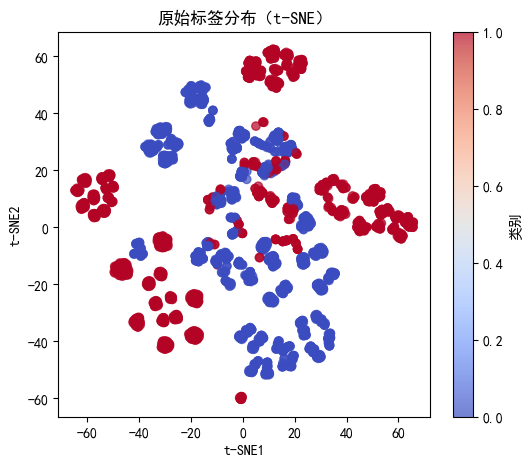

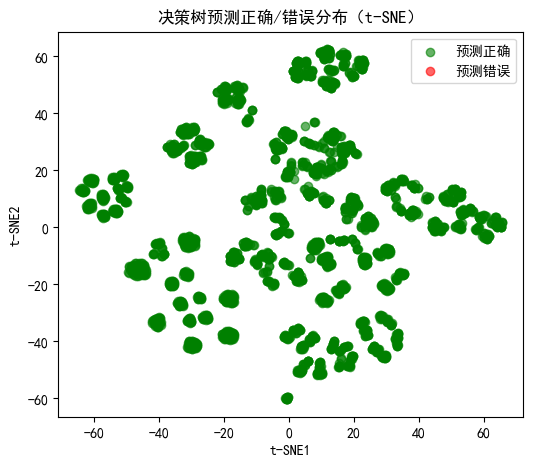

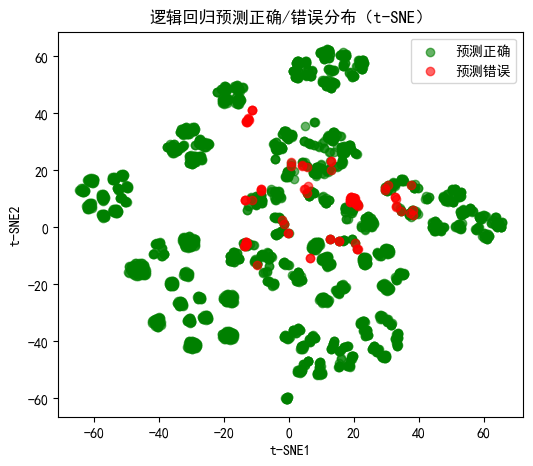

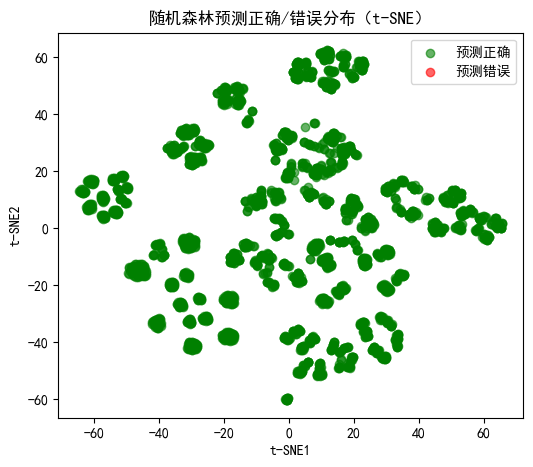

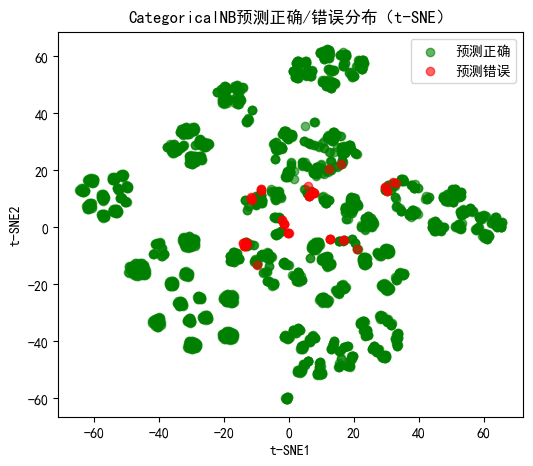

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE

# t-SNE降维（只做一次）
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_test)

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

# 1. 原始标签分布
plt.figure(figsize=(6, 5))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_test, cmap='coolwarm', alpha=0.7)
plt.title('原始标签分布（t-SNE）')
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.colorbar(label='类别')
plt.show()

# 2. 决策树预测正确/错误分布
correct = (y_test == y_pred_tree)
plt.figure(figsize=(6, 5))
plt.scatter(X_tsne[correct, 0], X_tsne[correct, 1], c='g', label='预测正确', alpha=0.6)
plt.scatter(X_tsne[~correct, 0], X_tsne[~correct, 1], c='r', label='预测错误', alpha=0.6)
plt.title('决策树预测正确/错误分布（t-SNE）')
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.legend()
plt.show()

# 3. 逻辑回归预测正确/错误分布
correct = (y_test == y_pred_lr)
plt.figure(figsize=(6, 5))
plt.scatter(X_tsne[correct, 0], X_tsne[correct, 1], c='g', label='预测正确', alpha=0.6)
plt.scatter(X_tsne[~correct, 0], X_tsne[~correct, 1], c='r', label='预测错误', alpha=0.6)
plt.title('逻辑回归预测正确/错误分布（t-SNE）')
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.legend()
plt.show()

# 4. 随机森林预测正确/错误分布
correct = (y_test == y_pred_rf)
plt.figure(figsize=(6, 5))
plt.scatter(X_tsne[correct, 0], X_tsne[correct, 1], c='g', label='预测正确', alpha=0.6)
plt.scatter(X_tsne[~correct, 0], X_tsne[~correct, 1], c='r', label='预测错误', alpha=0.6)
plt.title('随机森林预测正确/错误分布（t-SNE）')
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.legend()
plt.show()

# 5. 朴素贝叶斯预测正确/错误分布
correct = (test_y == y_pred_CNB)
plt.figure(figsize=(6, 5))
plt.scatter(X_tsne[correct, 0], X_tsne[correct, 1], c='g', label='预测正确', alpha=0.6)
plt.scatter(X_tsne[~correct, 0], X_tsne[~correct, 1], c='r', label='预测错误', alpha=0.6)
plt.title('CategoricalNB预测正确/错误分布（t-SNE）')
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.legend()
plt.show()

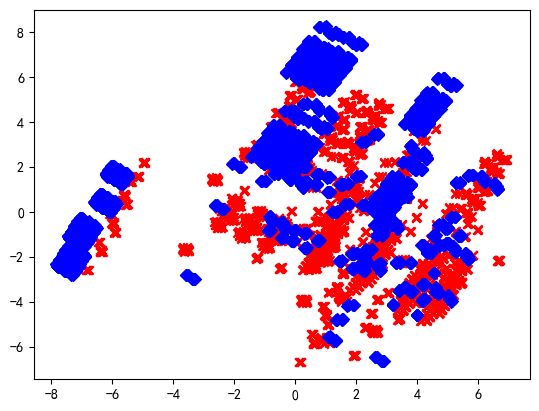

In [11]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA  # 加载PCA算法包
import numpy as np

pca = PCA(n_components=2)  # 加载PCA算法，设置降维后主成分数目为2
reduced_x = pca.fit_transform(X)  # 对样本进行降维

red_x, red_y = [], []
blue_x, blue_y = [], []
# print(reduced_x)
for i in range(len(reduced_x)):
    if y[i] == 0:
        red_x.append(reduced_x[i][0])
        red_y.append(reduced_x[i][1])
    elif y[i] == 1:
        blue_x.append(reduced_x[i][0])
        blue_y.append(reduced_x[i][1])
plt.scatter(red_x, red_y, c='r', marker='x')
plt.scatter(blue_x, blue_y, c='b', marker='D')
plt.show()
